In [1]:
import tensorflow_datasets as tfds

dataset, info = tfds.load("malaria", as_supervised=True, with_info=True)

In [2]:
print(info)

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir='C:\\Users\\Utilisateur\\tensorflow_datasets\\malaria\\1.0.0',
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection 

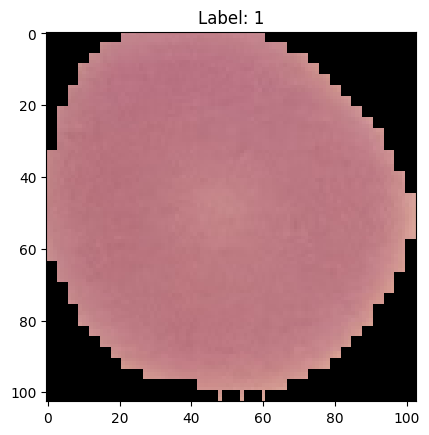

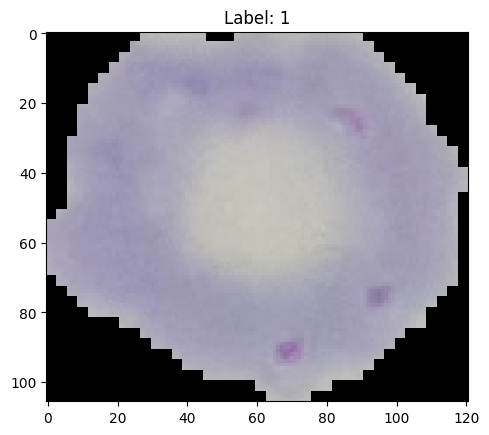

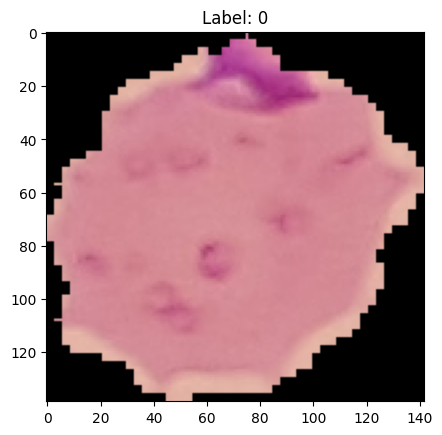

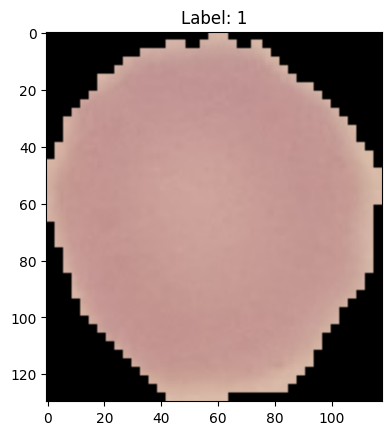

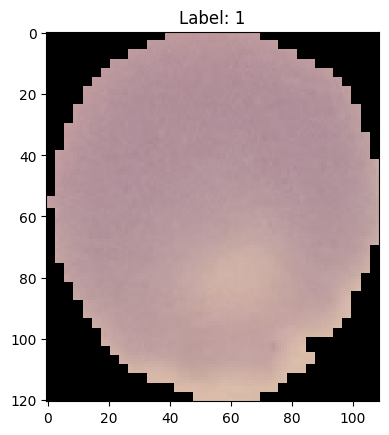

In [3]:
import matplotlib.pyplot as plt

for image, label in dataset['train'].take(5):
    plt.imshow(image.numpy(), cmap='gray')
    plt.title(f"Label: {label.numpy()}")
    plt.show()

In [4]:
train_size = 0.7
val_size = 0.15
test_size = 0.15

dataset = dataset['train'].shuffle(1000)
train = dataset.take(int(train_size * len(dataset)))
val = dataset.skip(int(train_size * len(dataset))).take(int(val_size * len(dataset)))
test = dataset.skip(int((train_size + val_size) * len(dataset)))